In [12]:
%matplotlib inline
import numpy as np
import pandas
from sklearn import svm
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import speed_regression.training_data as td

In [15]:
data_path = '../../data/20170118031852'
model_path = '../../data/model_walk.svm'
regressor = joblib.load(model_path)
data_valid_all = pandas.read_csv(data_path + '/processed/data.csv')
options = td.TrainingDataOption(sample_step=1)
data_factory = td.SpeedRegressionTrainData(options)

imu_columns = 'gyro_w,gyro_x,gyro_y,gyro_z,acce_x,acce_y,acce_z'.split(',')
features, targets = data_factory.CreateTrainingData(data_valid_all, imu_columns)

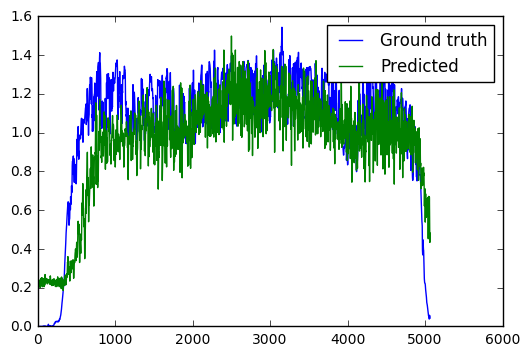

In [16]:
predicted = regressor.predict(features)
x = [i for i in range(predicted.shape[0])]
plt.plot(x, targets)
plt.plot(x, predicted)
plt.legend(['Ground truth', 'Predicted'])